# Mall customers 2

#### Problem Statement
#### You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv(r'C:\Users\Ahmed\Downloads\Mall_Customers (2).csv')

## 1- Explore Data

In [3]:
#data.head()
#data.tail()
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
164,165,Male,50,85,26
6,7,Female,35,18,6
91,92,Male,18,59,41
151,152,Male,39,78,88
75,76,Male,26,54,54
22,23,Female,46,25,5
180,181,Female,37,97,32
174,175,Female,52,88,13
134,135,Male,20,73,5
105,106,Female,21,62,42


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2-Transform opject data 

In [7]:
la=LabelEncoder()

In [8]:
data.Gender=la.fit_transform(data.Gender)

In [9]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 3- Creat Module

In [11]:
la=StandardScaler()
xdata=la.fit_transform(data)

In [12]:
clustersn=[]
j=[]

In [13]:
for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(data)
    clustersn.append(i)
    j.append(model.inertia_)

C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
pd.DataFrame(clustersn,j)

,0
975512.060000,1
387065.713771,2
271396.562966,3
195401.198560,4
157183.296374,5
122630.441753,6
103224.501921,7
86053.674448,8
76915.661351,9
68978.098931,10


Text(0, 0.5, 'Perc of Error')

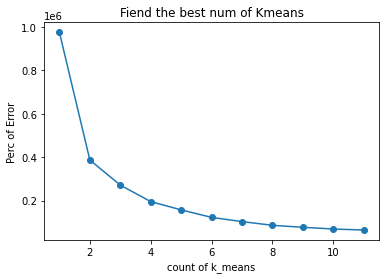

In [15]:
plt.plot(clustersn,j,marker='o')
plt.title('Fiend the best num of Kmeans')
plt.xlabel('count of k_means')
plt.ylabel('Perc of Error')

In [16]:
model=KMeans(n_clusters=4)
model.fit(xdata)
pre=model.predict(xdata)

In [32]:
data['k_mean']=pre

In [33]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

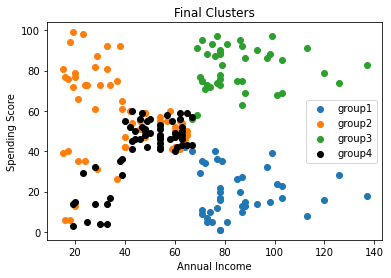

In [20]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4',color='black')
plt.title('Final Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

## Result Without Standard Scaler

In [35]:
model2=KMeans(n_clusters=4)
model2.fit(data)
pre=model2.predict(data)

In [36]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

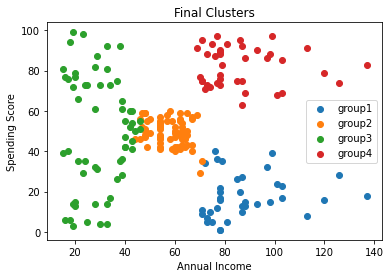

In [37]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4')
plt.title('Final Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

## Data Analysis

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_mean', ylabel='count'>

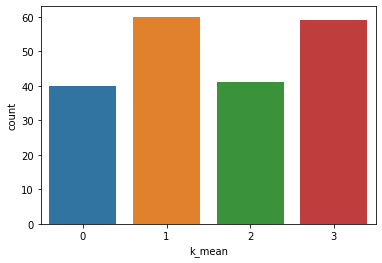

In [22]:
sns.countplot(data.k_mean)

<AxesSubplot:ylabel='k_mean'>

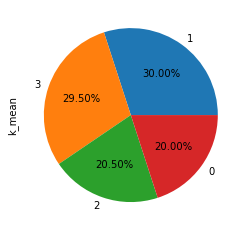

In [23]:
data['k_mean'].value_counts().plot.pie(autopct='%0.2f%%')

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_mean', ylabel='Spending Score (1-100)'>

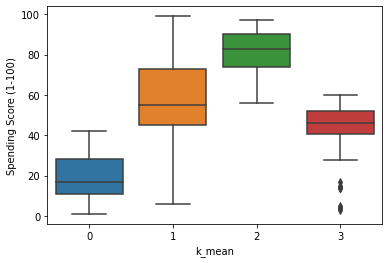

In [24]:
sns.boxplot(data.k_mean,data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

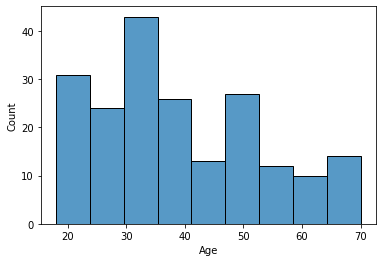

In [25]:
sns.histplot(data.Age)

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_mean', ylabel='count'>

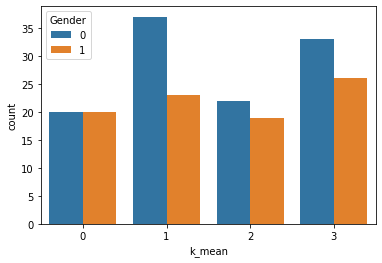

In [26]:
sns.countplot(data.k_mean,hue=data.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

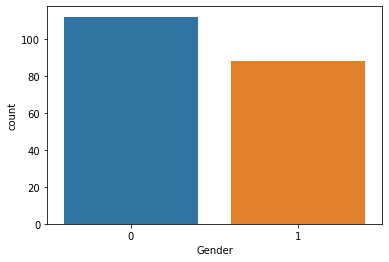

In [27]:
sns.countplot(data=data,x='Gender')